In [1]:
import time
start=time.time()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import cv2
from keras.models import Model,Sequential
from keras.layers import Input, Dropout, Flatten, Conv2D, MaxPooling2D, Dense, Activation
from keras.layers.normalization import BatchNormalization
import os
import seaborn as sns

In [2]:
print(os.listdir("C:/covid1_data/"))

['test', 'train']


In [3]:
size=224

train_images=[]
train_labels=[]
for directory_path in glob.glob("C:/covid1_data/train/*"):
    label=directory_path.split("\\")[-1]
   # print(label)
    for img_path in glob.glob(os.path.join(directory_path,"*.JPG")):
        #print(img_path)
        img=cv2.imread(img_path,cv2.IMREAD_COLOR)
        img=cv2.resize(img,(size,size))
        img=cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)   
train_images=np.array(train_images)
train_labels=np.array(train_labels)

In [4]:
test_images=[]
test_labels=[]
for directory_path in glob.glob("C:/covid1_data/test/*"):
    label=directory_path.split("\\")[-1]
   # print(label)
    for img_path in glob.glob(os.path.join(directory_path,"*.JPG")):
        #print(img_path)
        img=cv2.imread(img_path,cv2.IMREAD_COLOR)
        img=cv2.resize(img,(size,size))
        img=cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(label)
test_images=np.array(test_images)
test_labels=np.array(test_labels)

In [5]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded=le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded=le.transform(train_labels)

In [6]:
X_train,y_train,X_test,y_test = train_images,train_labels_encoded,test_images,test_labels_encoded

X_train,X_test=X_train/255.0,X_test/255.0

In [7]:
from tensorflow.keras.applications.nasnet import NASNetMobile
base_model =NASNetMobile(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')

In [8]:
for layer in base_model.layers:
    layer.trainable = False

In [9]:
x = Flatten()(base_model.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input,outputs= x)

In [10]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',f1_m,precision_m, recall_m])

In [11]:
start1=time.time()
history=model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))
end1=time.time()
print(f"Total time is {end1 - start1} seconds")

Epoch 1/50
54/54 [==============================] - 212s 3s/step - loss: 7.7112 - accuracy: 0.8572 - f1_m: 0.8824 - precision_m: 0.9093 - recall_m: 0.8917 - val_loss: 0.1768 - val_accuracy: 0.9908 - val_f1_m: 0.7817 - val_precision_m: 0.7802 - val_recall_m: 0.7835
Epoch 2/50
54/54 [==============================] - 171s 3s/step - loss: 0.1119 - accuracy: 0.9931 - f1_m: 0.9948 - precision_m: 0.9960 - recall_m: 0.9941 - val_loss: 0.1768 - val_accuracy: 0.9931 - val_f1_m: 0.7806 - val_precision_m: 0.7802 - val_recall_m: 0.7812
Epoch 3/50
54/54 [==============================] - 166s 3s/step - loss: 0.2890 - accuracy: 0.9884 - f1_m: 0.9923 - precision_m: 0.9960 - recall_m: 0.9889 - val_loss: 0.0995 - val_accuracy: 0.9908 - val_f1_m: 0.7817 - val_precision_m: 0.7802 - val_recall_m: 0.7835
Epoch 4/50
54/54 [==============================] - 168s 3s/step - loss: 0.0061 - accuracy: 0.9992 - f1_m: 0.9995 - precision_m: 0.9991 - recall_m: 0.9999 - val_loss: 0.2242 - val_accuracy: 0.9885 - val_f1

Epoch 32/50
54/54 [==============================] - 170s 3s/step - loss: 1.7215e-08 - accuracy: 1.0000 - f1_m: 1.0000 - precision_m: 1.0000 - recall_m: 1.0000 - val_loss: 0.4297 - val_accuracy: 0.9885 - val_f1_m: 0.7829 - val_precision_m: 0.7802 - val_recall_m: 0.7857
Epoch 33/50
54/54 [==============================] - 170s 3s/step - loss: 6.9798e-10 - accuracy: 1.0000 - f1_m: 1.0000 - precision_m: 1.0000 - recall_m: 1.0000 - val_loss: 0.4297 - val_accuracy: 0.9885 - val_f1_m: 0.7829 - val_precision_m: 0.7802 - val_recall_m: 0.7857
Epoch 34/50
54/54 [==============================] - 175s 3s/step - loss: 8.0274e-09 - accuracy: 1.0000 - f1_m: 1.0000 - precision_m: 1.0000 - recall_m: 1.0000 - val_loss: 0.4297 - val_accuracy: 0.9885 - val_f1_m: 0.7829 - val_precision_m: 0.7802 - val_recall_m: 0.7857
Epoch 35/50
54/54 [==============================] - 170s 3s/step - loss: 4.1906e-12 - accuracy: 1.0000 - f1_m: 1.0000 - precision_m: 1.0000 - recall_m: 1.0000 - val_loss: 0.4297 - val_accur

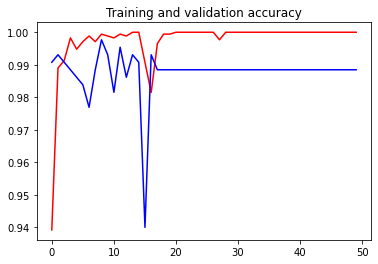

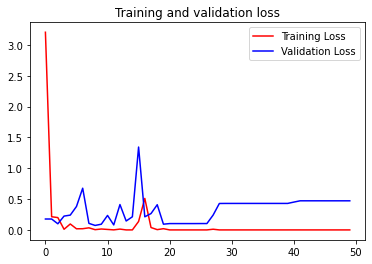

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')

plt.legend()

plt.show()

[[111   5]
 [  0 317]]


<AxesSubplot:>

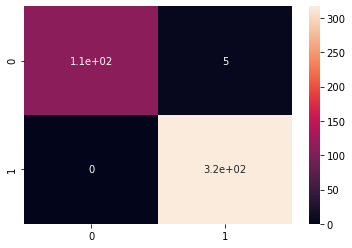

In [13]:
y_pred = model.predict(X_test)
y_pred =(y_pred>0.5)
list(y_pred)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,annot=True)

In [14]:
test3_images=[]
test3_labels=[]
for directory_path in glob.glob("C:/covid_data/test/*"):
    label=directory_path.split("\\")[-1]
    #print(label)
    for img_path in glob.glob(os.path.join(directory_path,"*.PNG")):
       # print(img_path)
        img=cv2.imread(img_path,cv2.IMREAD_COLOR)
        img=cv2.resize(img,(size,size))
        img=cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        test3_images.append(img)
        test3_labels.append(label)
test3_images=np.array(test3_images)
test3_labels=np.array(test3_labels)

In [15]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
le.fit(test3_labels)
test3_labels_encoded=le.transform(test3_labels)

In [16]:
X3_test,y3_test = test3_images,test3_labels_encoded

X3_test=X3_test/255.0

In [17]:
start2=time.time()
history1=model.evaluate(X3_test,y3_test,steps=20)
end2=time.time()
print(f"Total time is {end2 - start2} seconds")

20/20 [==============================] - 7s 362ms/step - loss: 0.0799 - accuracy: 0.9896 - f1_m: 0.6944 - precision_m: 0.7000 - recall_m: 0.6900
Total time is 7.3405656814575195 seconds


[[30  0]
 [ 1 65]]
Total time taken by this program is 8893.92408823967 seconds


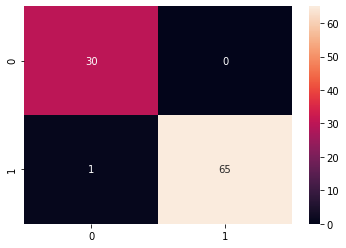

In [18]:
y3_pred = model.predict(X3_test)
y3_pred =(y3_pred>0.5)
list(y3_pred)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y3_test, y3_pred)
print(cm)
sns.heatmap(cm,annot=True)
end=time.time()
print(f"Total time taken by this program is {end - start} seconds")